# Neste primeiro exercício vamos utilizar os dados de Galton que foram a origem da teoria de regressão linear

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn

importando dados do Galton

In [2]:
filepath = os.path.join('..', 'data', 'Galton.csv')
filepath

'../data/Galton.csv'

In [3]:
Galton = pd.read_csv(filepath)

In [4]:
Galton.head(10)

,Family,Father,Mother,Gender,Height,Kids
0,1,1.9939,1.7018,M,1.85928,4
1,1,1.9939,1.7018,F,1.75768,4
2,1,1.9939,1.7018,F,1.75260,4
3,1,1.9939,1.7018,F,1.75260,4
4,2,1.9177,1.6891,M,1.86690,4
5,2,1.9177,1.6891,M,1.84150,4
6,2,1.9177,1.6891,F,1.66370,4
7,2,1.9177,1.6891,F,1.66370,4
8,3,1.9050,1.6256,M,1.80340,2
9,3,1.9050,1.6256,F,1.72720,2


Criando Vetores com Variável Dependentes (Resposta) e Independente (Co-variável)

In [5]:
X=Galton['Father']
Y=Galton['Height']
print(X.head(20))
print(X.tail(20))


0     1.9939
1     1.9939
2     1.9939
3     1.9939
4     1.9177
5     1.9177
6     1.9177
7     1.9177
8     1.9050
9     1.9050
10    1.9050
11    1.9050
12    1.9050
13    1.9050
14    1.9050
15    1.9050
16    1.9050
17    1.9050
18    1.9050
19    1.9050
Name: Father, dtype: float64
870    1.6256
871    1.6256
872    1.6256
873    1.6256
874    1.6256
875    1.6256
876    1.6256
877    1.6256
878    1.6256
879    1.6256
880    1.6256
881    1.6256
882    1.6256
883    1.6256
884    1.6256
885    1.5748
886    1.5748
887    1.5748
888    1.5875
889    1.5875
Name: Father, dtype: float64


Analisando Histograma

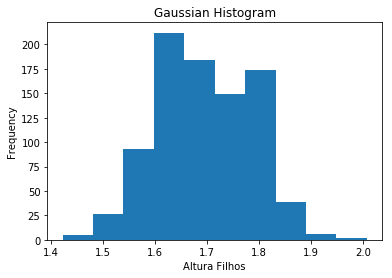

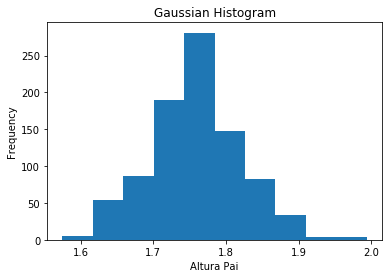

In [6]:
plt.hist(Y)
plt.title("Gaussian Histogram")
plt.xlabel("Altura Filhos")
plt.ylabel("Frequency")
plt.show()

plt.hist(X)
plt.title("Gaussian Histogram")
plt.xlabel("Altura Pai")
plt.ylabel("Frequency")
plt.show()

Vamos criar amostra de teste e treinamento (Cuidado Overfiting)

Outra forma de separar os as bases em teste e treinamento 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

In [9]:
X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)
print(X)
X_train = X[:-445]
X_test = X[-445:]
Y_train = Y[:-445]
Y_test = Y[-445:]


[[1.9939 ]
 [1.9939 ]
 [1.9939 ]
 [1.9939 ]
 [1.9177 ]
 [1.9177 ]
 [1.9177 ]
 [1.9177 ]
 [1.905  ]
 [1.905  ]
 [1.905  ]
 [1.905  ]
 [1.905  ]
 [1.905  ]
 [1.905  ]
 [1.905  ]
 [1.905  ]
 [1.905  ]
 [1.905  ]
 [1.905  ]
 [1.905  ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8923 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8796 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.8542 ]
 [1.85928]
 [1.84658]
 [1.84658]
 [1.84658]
 [1.84658]
 [1.84658]
 [1.84658]
 [1.84658]
 [1.84658]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]
 [1.8288 ]

Analisando a Correlação entre as variáveis 

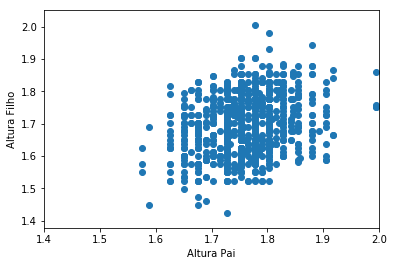

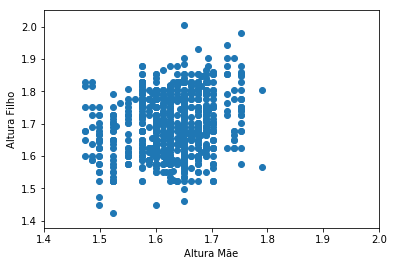

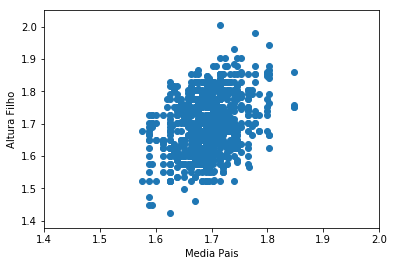

In [10]:
plt.scatter(X,Y)
plt.xlabel("Altura Pai")
plt.ylabel("Altura Filho")
plt.xlim(1.4,2)
plt.show() 

M = Galton['Mother']
plt.scatter(M,Y)
plt.xlabel("Altura Mãe")
plt.ylabel("Altura Filho")
plt.xlim(1.4,2)
plt.show() 

Z = (Galton['Father'] + Galton['Mother'])/2

# plotar média de altura dos pais
plt.scatter(Z,Y)
plt.xlabel("Media Pais")
plt.ylabel("Altura Filho")
plt.xlim(1.4,2)
plt.show() 

# Separar valores de Z
Z = Z.values.reshape(len(Z),1)
Z_train = Z[:-445]
Z_test = Z[-445:]

In [11]:
# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(Z_train, Y_train)

beta1=regr.coef_

intercepto=regr.intercept_

print(beta1)
print(intercepto)

#R quadrado da amostra de treinamento
regr.score(Z_train,Y_train)



[[0.61447521]]
[0.65998717]


0.05746936718620077

Analisando amostra de Teste

In [12]:
#R quadrado da amostra de teste
predictions = regr.predict(Z_test)
regr.score(predictions,Y_test)


-0.01650179567993426

Executando a regressao linear com altura do pai e da mae

In [13]:

X2_train = Galton[:-445]
X2_test = Galton[-445:]

X2_train=X2_train.drop(["Family"],axis=1)
X2_train=X2_train.drop(["Height"],axis=1)
X2_train=X2_train.drop(["Gender"],axis=1)
X2_train=X2_train.drop(["Kids"],axis=1)

X2_test=X2_test.drop(["Family"],axis=1)
X2_test=X2_test.drop(["Height"],axis=1)
X2_test=X2_test.drop(["Gender"],axis=1)
X2_test=X2_test.drop(["Kids"],axis=1)


X2_train.head(10)

,Father,Mother
0,1.9939,1.7018
1,1.9939,1.7018
2,1.9939,1.7018
3,1.9939,1.7018
4,1.9177,1.6891
5,1.9177,1.6891
6,1.9177,1.6891
7,1.9177,1.6891
8,1.9050,1.6256
9,1.9050,1.6256


In [14]:
regr.fit(X2_train, Y_train)

beta1=regr.coef_

intercepto=regr.intercept_

print(beta1)
print(intercepto)

#R quadrado da amostra de treinamento
regr.score(X2_train,Y_train)

[[0.25934756 0.32925071]]
[0.71045998]


0.05822633538328736

In [15]:
regr.score(X2_test,Y_test)

0.015641111550648623

## Testando apenas com diferença de sexos

In [16]:
import seaborn as sns

In [17]:
Galton['Parents_Avg'] = (Galton['Father']+Galton['Mother'])/2
Galton_M = Galton[Galton.Gender == 'M']
Galton_F = Galton[Galton.Gender == 'F']

In [18]:
Galton_M.head()

,Family,Father,Mother,Gender,Height,Kids,Parents_Avg
0,1,1.9939,1.7018,M,1.85928,4,1.84785
4,2,1.9177,1.6891,M,1.86690,4,1.80340
5,2,1.9177,1.6891,M,1.84150,4,1.80340
8,3,1.9050,1.6256,M,1.80340,2,1.76530
10,4,1.9050,1.6256,M,1.79070,5,1.76530


In [19]:
Galton_F.head()

,Family,Father,Mother,Gender,Height,Kids,Parents_Avg
1,1,1.9939,1.7018,F,1.75768,4,1.84785
2,1,1.9939,1.7018,F,1.75260,4,1.84785
3,1,1.9939,1.7018,F,1.75260,4,1.84785
6,2,1.9177,1.6891,F,1.66370,4,1.80340
7,2,1.9177,1.6891,F,1.66370,4,1.80340


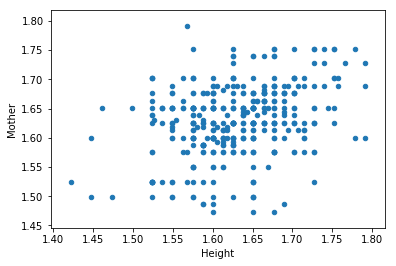

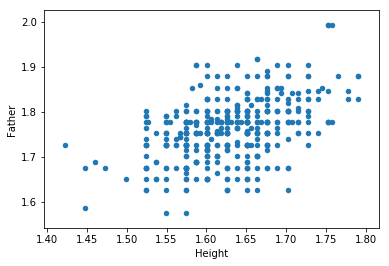

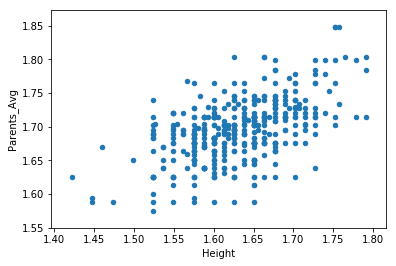

In [20]:
Galton_F.plot(kind='scatter', x='Height', y='Mother',title='')
Galton_F.plot(kind='scatter', x='Height', y='Father',title='')
Galton_F.plot(kind='scatter', x='Height', y='Parents_Avg',title='')

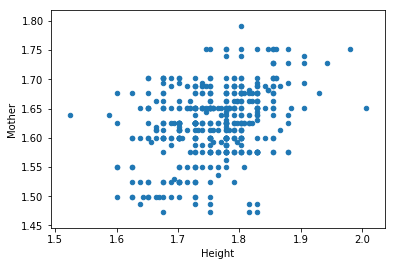

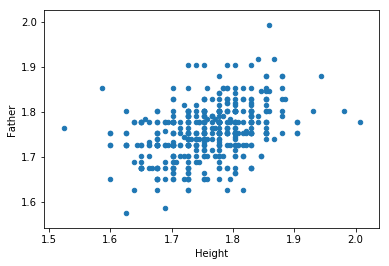

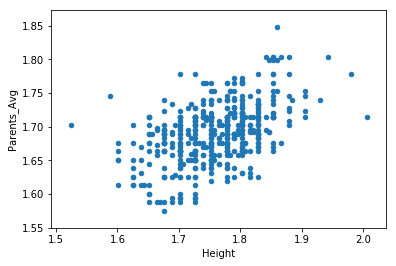

In [21]:
Galton_M.plot(kind='scatter', x='Height', y='Mother',title='')
Galton_M.plot(kind='scatter', x='Height', y='Father',title='')
Galton_M.plot(kind='scatter', x='Height', y='Parents_Avg',title='')

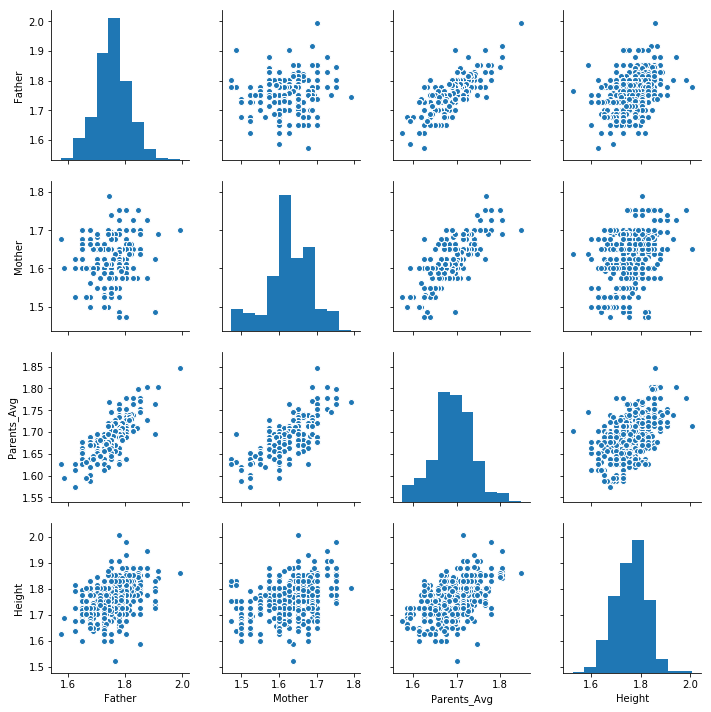

In [22]:
sns.pairplot(Galton_M[['Father','Mother','Parents_Avg','Height']])

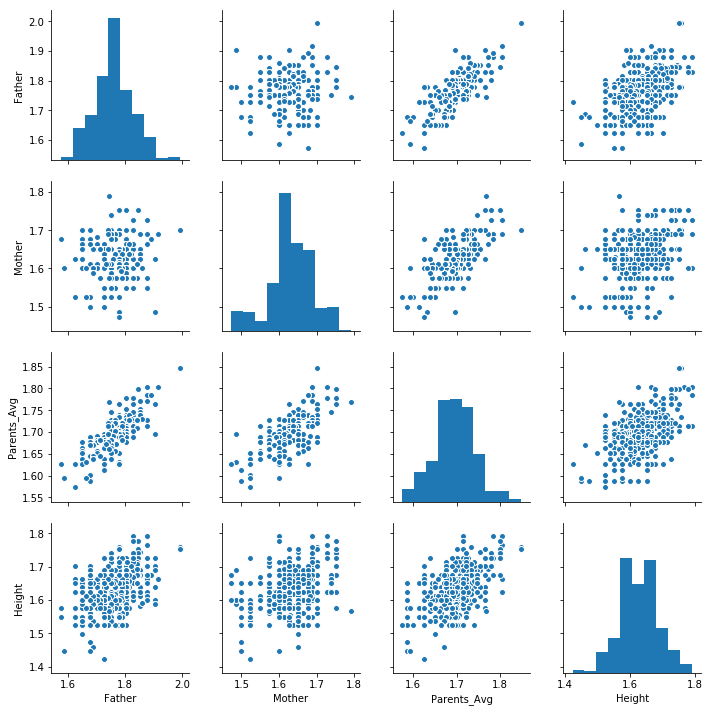

In [23]:
sns.pairplot(Galton_F[['Father','Mother','Parents_Avg','Height']])

In [24]:
Galton_M[['Father','Mother','Parents_Avg','Height']].corr()

,Father,Mother,Parents_Avg,Height
Father,1.000000,0.107840,0.739959,0.392561
Mother,0.107840,1.000000,0.748526,0.334667
Parents_Avg,0.739959,0.748526,1.000000,0.488271
Height,0.392561,0.334667,0.488271,1.000000


In [25]:
Galton_F[['Father','Mother','Parents_Avg','Height']].corr()

,Father,Mother,Parents_Avg,Height
Father,1.000000,0.041881,0.769097,0.458515
Mother,0.041881,1.000000,0.670782,0.314607
Parents_Avg,0.769097,0.670782,1.000000,0.541610
Height,0.458515,0.314607,0.541610,1.000000


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
def LinearReg(X_train,
              X_test,
              Y_train,
              Y_test):
    result={}
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(X_train, Y_train)
    
    beta1=regr.coef_
    
    intercepto=regr.intercept_
    
    result['Beta1'] = beta1
    result['Intercepto'] = intercepto
    
    # R quadrado da amostra de treinamento
    result['Score Train'] = regr.score(X_train,Y_train)
    
    #R quadrado da amostra de teste
    result['Score Test'] = regr.score(X_test, Y_test)
    
    return result

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(Galton[['Father','Mother']], Galton['Height'], test_size=0.5, random_state=101)
LinearReg(X_train, X_test, Y_train, Y_test)

{'Beta1': array([0.38206046, 0.34788529]),
 'Intercepto': 0.4570043703284641,
 'Score Test': 0.0816308012618191,
 'Score Train': 0.13652768494494405}

## Modelo de Regressão para o sexo Masculino

In [29]:
X_M_train, X_M_test, Y_M_train, Y_M_test = train_test_split(Galton_M[['Father','Mother']], Galton_M['Height'], test_size=0.5, random_state=101)
LinearReg(X_M_train, X_M_test, Y_M_train, Y_M_test)

{'Beta1': array([0.42314225, 0.30192459]),
 'Intercepto': 0.5270524733799757,
 'Score Test': 0.2297863347543927,
 'Score Train': 0.24481128998934779}

## Modelo de Regressão para o sexo Feminino

In [30]:
X_F_train, X_F_test, Y_F_train, Y_F_test = train_test_split(Galton_F[['Father','Mother']], Galton_F['Height'], test_size=0.5, random_state=101)
LinearReg(X_F_train, X_F_test, Y_F_train, Y_F_test)

{'Beta1': array([0.34663931, 0.33185321]),
 'Intercepto': 0.4782034539171951,
 'Score Test': 0.2718547112325598,
 'Score Train': 0.3238685837467127}

## Modelo de Regressão substituindo mo valor Gender por 0 e 1

Quando uma váriavel possui **n** *categorias* deve-se criar **n-1** *variáveis burras* com valor 0 e 1

In [31]:
Galton_MF = Galton.copy()
Galton_MF['Gender'] = Galton_MF['Gender'].replace(
    to_replace={
        'F':0,
        'M':1
    }
) 

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(Galton_MF[['Father','Mother','Gender']], Galton_MF['Height'], test_size=0.5, random_state=101)
LinearReg(X_train, X_test, Y_train, Y_test)

{'Beta1': array([0.37740146, 0.38491825, 0.1197786 ]),
 'Intercepto': 0.3419693199750464,
 'Score Test': 0.6643533096048759,
 'Score Train': 0.5934009687079898}